In [1]:
import os
os.environ['TEM_WORD_DISTANCE_ENDPOINT'] = 'http://localhost:8000/similarity'

from matplotlib import pyplot as plt
import numpy as np
import numpy.typing as npt
import yaml

from model import TopicEvolution
from nlp import get_structured_corpus
from process import TEM
from visualization import plot_metrics, graph

In [2]:
float_formatter = "{:.6f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
def preprocess():
    for source in ['humans', 'machines']:
        with open(f'ignoreme-data/{source}.yaml', 'r') as fp:
            raw = np.array([item['text'] for item in yaml.safe_load(fp) if 'text' in item and item['text']])
        prep = list()
        for text in raw:
            try:
                corpus = get_structured_corpus(text)
                prep.append(corpus)
            except:
                continue
        with open(f'ignoreme-data/{source}_prep.yaml', 'w') as fp:
            yaml.dump(prep, fp, default_flow_style=False)
# preprocess()

In [4]:
samples = 50

def get_samples(new=False) -> list[str]:
    def _take_samples() -> list[str]:
        def __sample_from(source: str) -> list[str]:
            with open(f'ignoreme-data/{source}_prep.yaml', 'r') as fp:
                data = np.array(yaml.safe_load(fp))
                choice = np.random.choice(len(data), samples, replace=False)
                return data[choice]
        texts = np.concatenate([__sample_from('humans'), __sample_from('machines')])
        for i, text in enumerate(texts):
            with open(f'ignoreme-data/text_{i}.txt', 'w') as fp:
                fp.write(text)
        return texts

    def _load_samples() -> list[str]:
        texts = list()
        for i in range(samples * 2):
            with open(f'ignoreme-data/text_{i}.txt', 'r') as fp:
                texts.append(fp.read())
        return texts
    
    return _take_samples() if new else _load_samples()

texts = get_samples(new=True)

In [5]:
params = np.array([
    0.5, # c
    0, # alpha
    0, # beta
    0, # gamma
    1, # delta
    0.35, # theta
    0.35, # merge_threshold
    0.6 # evolution_threshold
])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


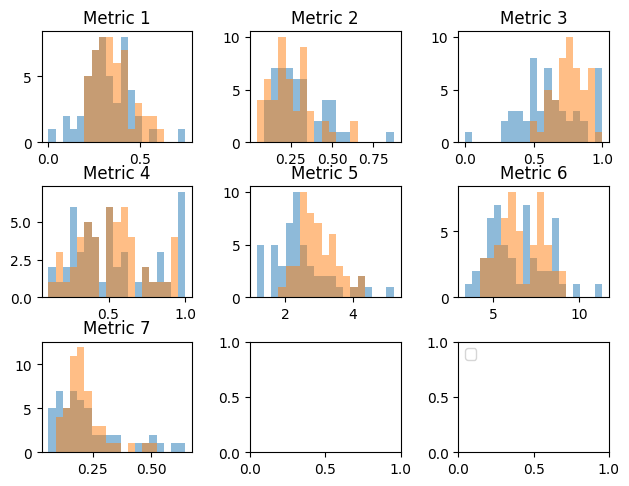

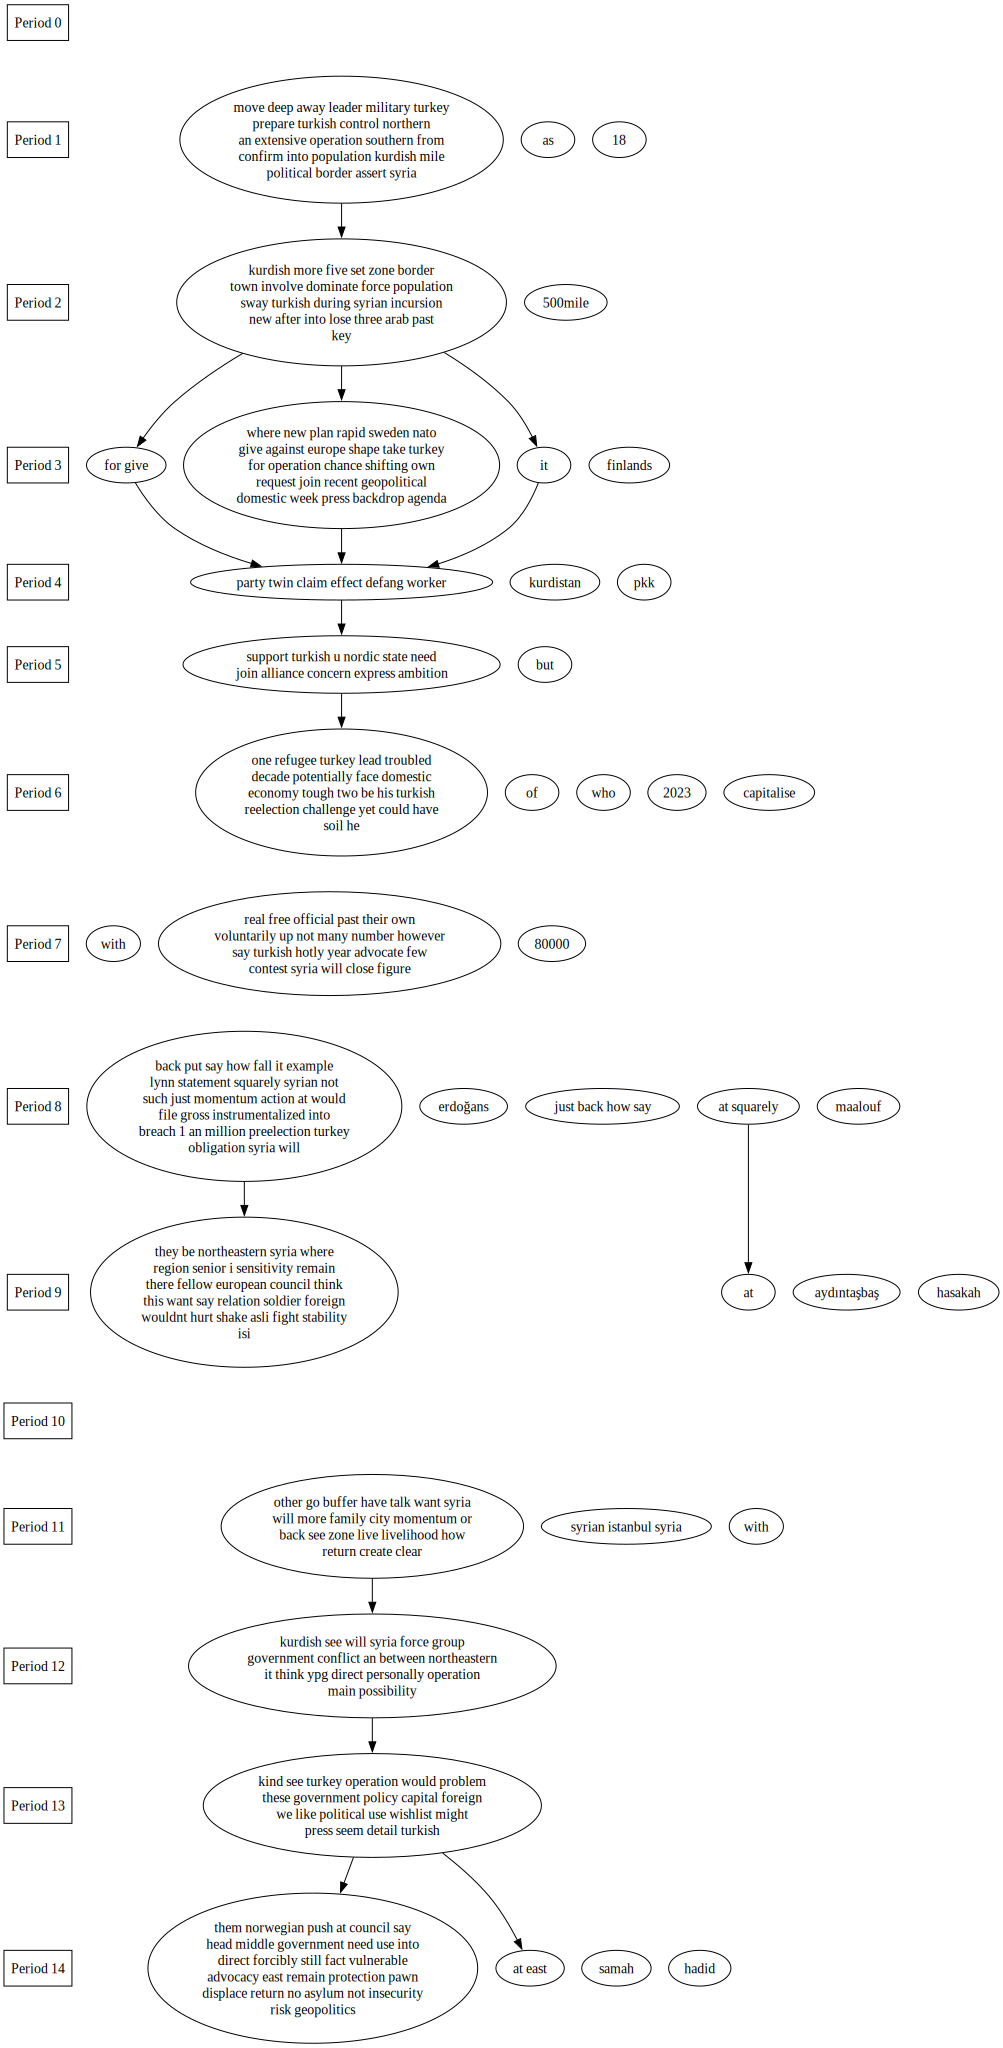

In [10]:
plot_metrics(texts, samples, params)
model = TEM.from_param_list(params)
graph(TopicEvolution(model.get_outputs([texts[0]])[0]))